In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing the packages for the building the prediction model

In [7]:
red_wine = pd.read_csv('C:/Users/kamalsaran/Desktop/bader/red_wine_quality.csv')
# Importing the red wine dataset using pandas package

In [8]:
red_wine.head()
# head outputs the first five rows of the red wine dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\kamalsaran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kamalsaran\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kamalsaran\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kamalsaran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


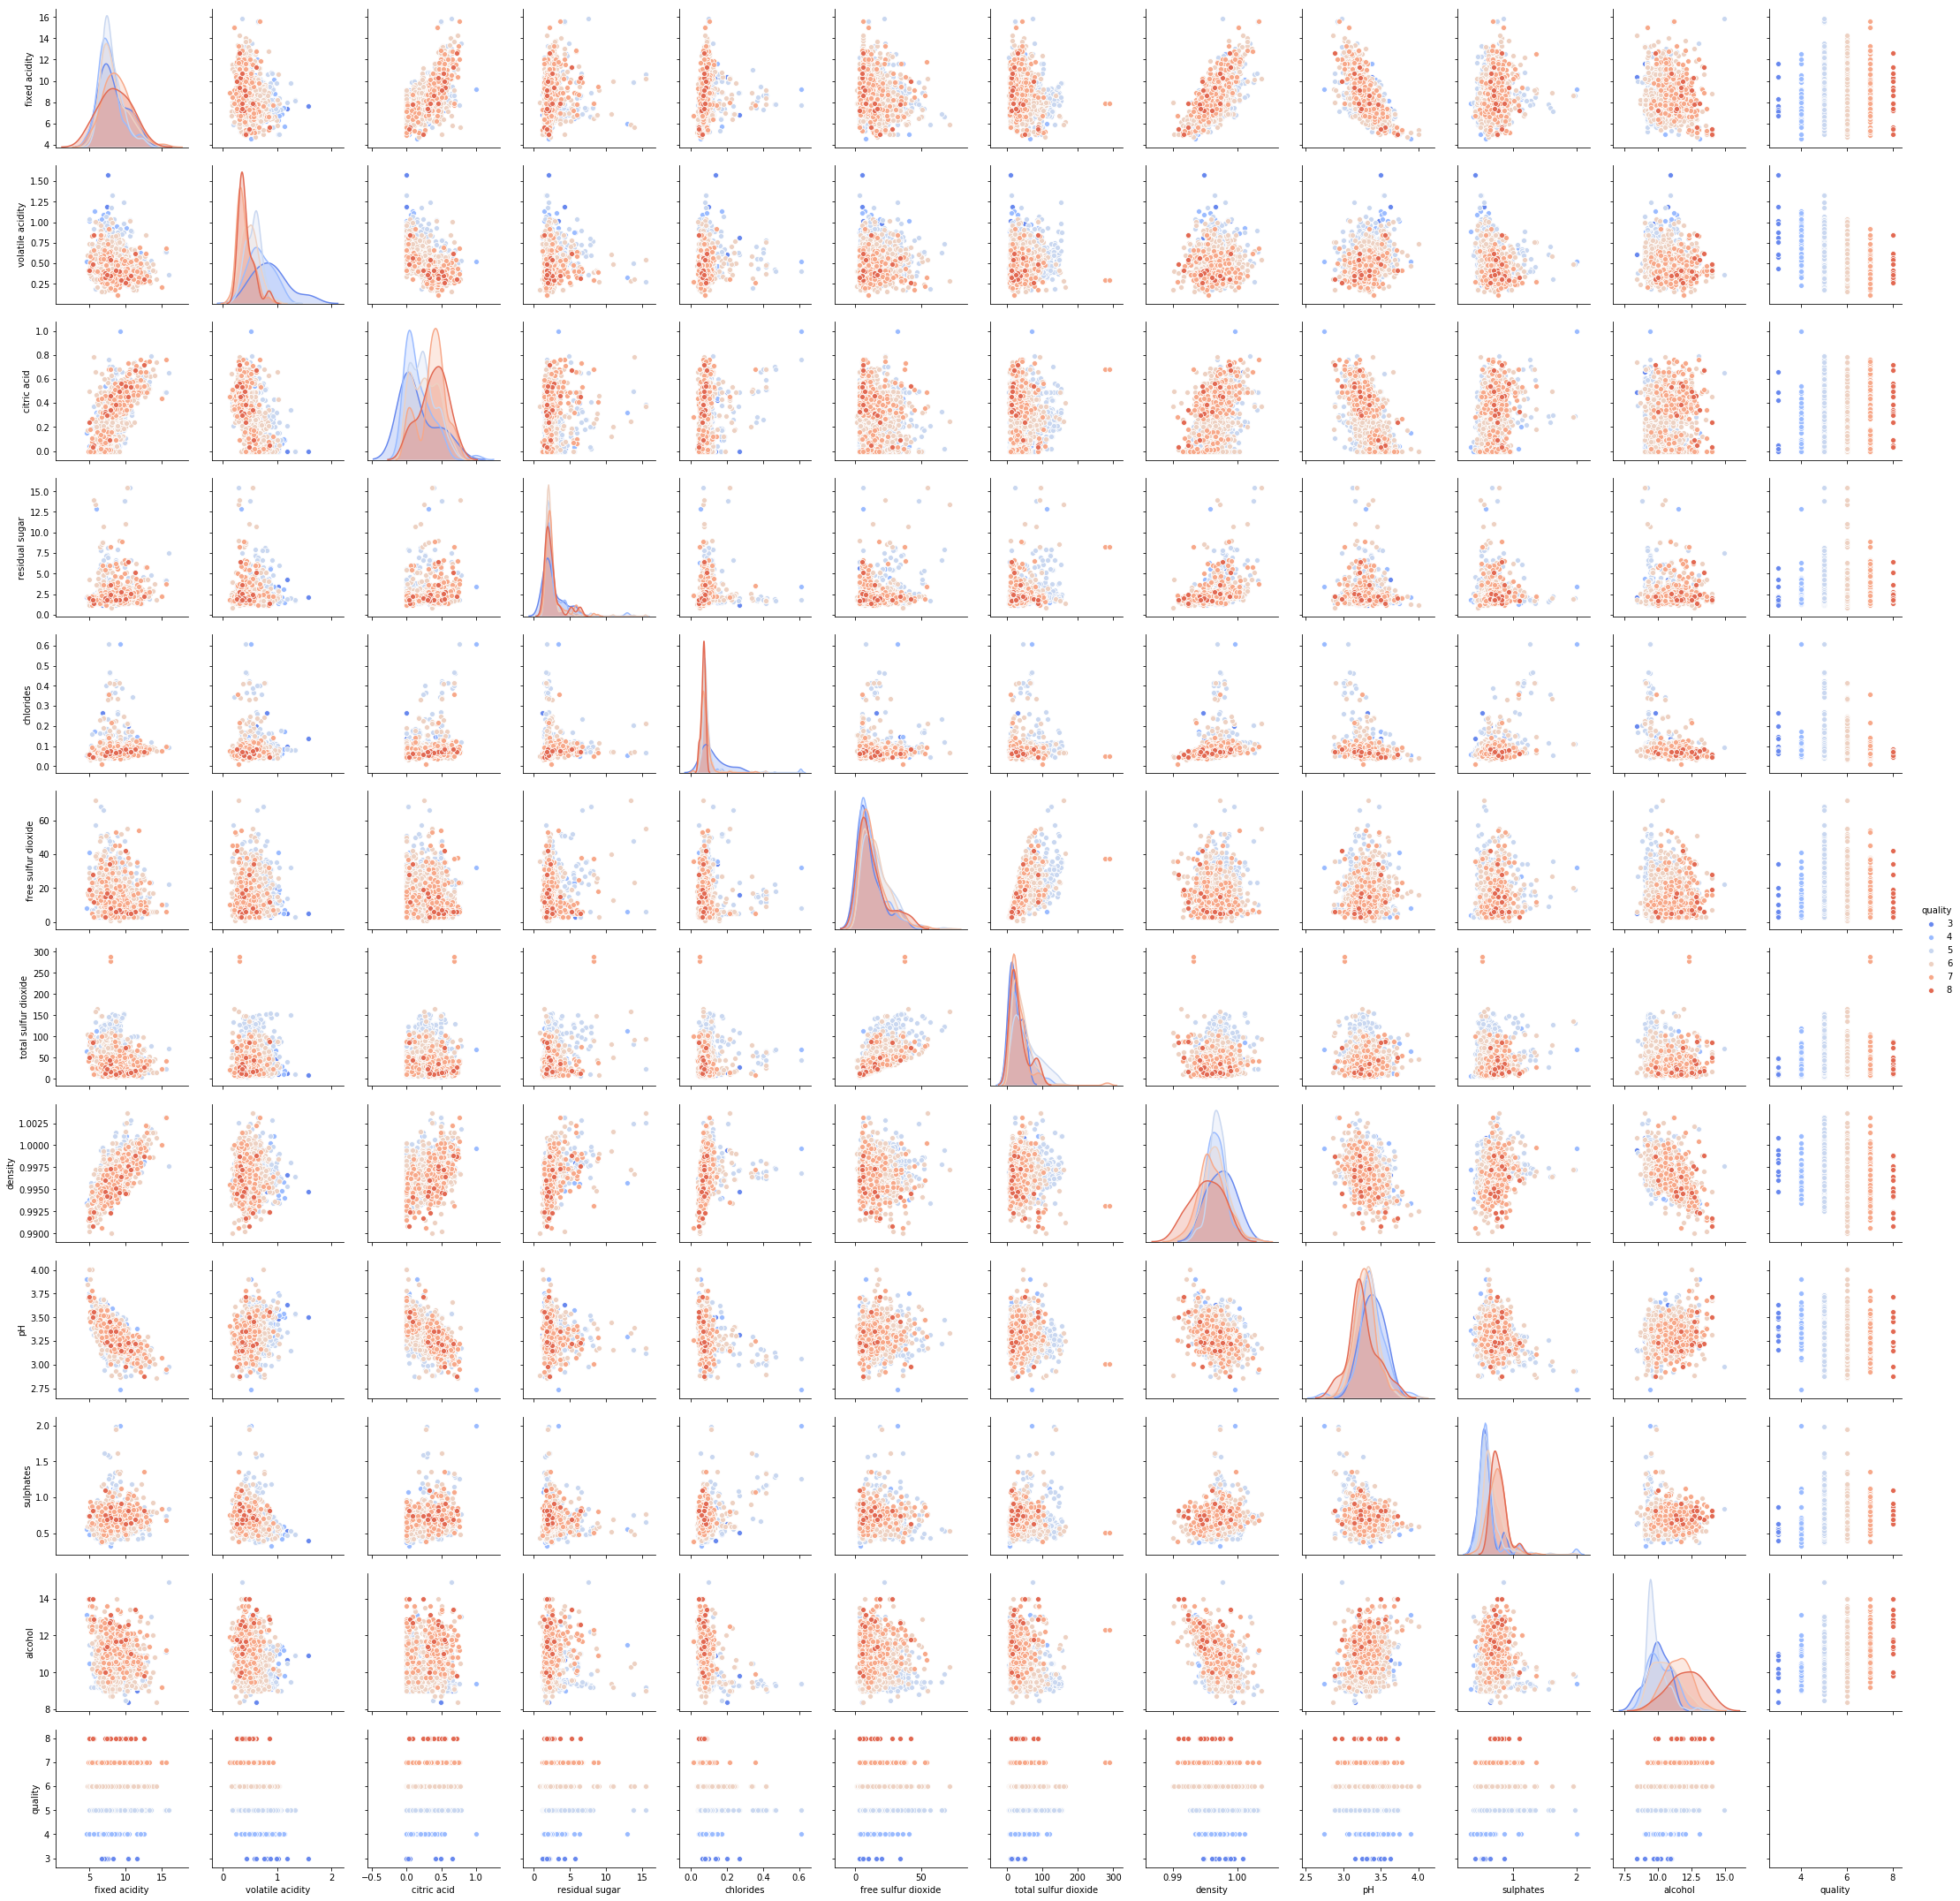

In [9]:
sns.pairplot(red_wine, hue='quality', palette = 'coolwarm')
# the seaborn pairplot gives the visualization between each and every attribute in the red wine dataset

In [10]:
from sklearn.preprocessing import StandardScaler
# Scaling the dataset so that each attribute has equal weightage. Which means no single attribute which has large values doesn't affect the output.

In [11]:
scaler = StandardScaler()

In [13]:
scaler.fit(red_wine.drop('quality',axis=1))
# Fitting the red wine dataset and dropping the label attribute which needs to be predicted

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(red_wine.drop('quality',axis=1))
# Transforming the red wine dataset i.e. the dataset is being standardized

In [16]:
red_wine_scaled = pd.DataFrame(scaled_features, columns= red_wine.columns[:-1])

In [17]:
red_wine_scaled.head()
# The scaled red wine dataset which outputs the first five rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [20]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,red_wine['quality'],
                                                    test_size=0.30)
# 70% of the data for the training and building the model and 30% for testing and validation of the model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# Importing KNeighbors Classifier from the Scikit learn package

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
# Mentioning the number of nearest neighbors for building the model

In [25]:
knn.fit(X_train,y_train)
# Fitting the KNearest Neighbors with the training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [26]:
pred = knn.predict(X_test)
# Predicting the label attribute i.e. quality of the red wine using KNearest Neighbors algorithm

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
# Importing the metrics for validating the model using the Scikit learn package and importing the confusion matrix and classification report

In [28]:
print(confusion_matrix(y_test,pred))
# The output of the confusion matrix resultwhich gives the comparsion between the predicted value and the label i.e. target attribute

[[  0   1   0   1   0   0]
 [  0   0  16   5   0   0]
 [  0   1 133  54   5   0]
 [  0   1  68 103  16   0]
 [  0   0   9  34  27   0]
 [  0   0   1   0   5   0]]


In [29]:
print(classification_report(y_test,pred))
# The classification report gives the comparsion between prediction result and original result

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        21
          5       0.59      0.69      0.63       193
          6       0.52      0.55      0.54       188
          7       0.51      0.39      0.44        70
          8       0.00      0.00      0.00         6

avg / total       0.51      0.55      0.53       480



C:\Users\kamalsaran\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    # For choosing the correct K value which could increase the accuracy and precision results

Text(0,0.5,'Error Rate')

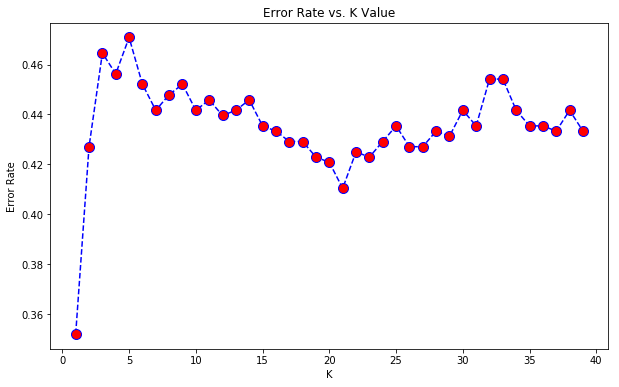

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# The figure shows the comparsion between the error rates for different K values

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K value of 3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
# Substituting the right value of K, which gives the result which has the least error rate for the KNearest Neighbors model

WITH K value of 3


[[  1   0   0   1   0   0]
 [  0   3  14   4   0   0]
 [  1   8 116  65   3   0]
 [  0   8  58 108  14   0]
 [  0   0  13  26  29   2]
 [  0   0   1   0   5   0]]


             precision    recall  f1-score   support

          3       0.50      0.50      0.50         2
          4       0.16      0.14      0.15        21
          5       0.57      0.60      0.59       193
          6       0.53      0.57      0.55       188
          7       0.57      0.41      0.48        70
          8       0.00      0.00      0.00         6

avg / total       0.53      0.54      0.53       480

